In [1]:
!pip install patool
!pip install sktime
!pip install reformer-pytorch

from google.colab import drive
drive.mount('/content/gdrive')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for axial-positional-embedding: filename=axial_positional_embedding-0.2.1-py3-none-any.whl size=2882 sha256=5f660b87d42b26ecc5592ca8398b1fb039d9b51ddffdc9aa9844314464e20479
  Stored in directory: /root/.cache/pip/wheels/b1/cb/39/7ce7ff2d2fd37cfe1fe7b3a3c43cf410632b2ad3b3f3986d73
Successfully built axial-positional-embedding
Mounted at /content/gdrive


In [2]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, r"/content/gdrive/MyDrive/Time-Series-Library")

from data_provider.data_factory import data_provider
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from exp.exp_imputation import Exp_Imputation
from exp.model_configurations import ModelConfig
from exp.WS_Dataset import Dataset_WS
import numpy as np
import pandas as pd
import torch


**Test på WS AGT_42 data**

In [3]:
data_path = r"/content/gdrive/MyDrive/Data/AGT_42.csv"

my_config_iTransformer_WS_AGT42 = ModelConfig(task_name="long_term_forecast",  is_training = 1, data_path = data_path,
                       model_id = 'WS_AGT42', model = 'TimesNet', data = 'WS_AGT42', features = 'M', e_layers = 2, d_layers =1,
                       factor = 3, seq_len = 10, label_len = 1, pred_len =5, enc_in = 10, dec_in = 10, c_out = 10, batch_size = 16, d_model = 64,
                       d_ff = 64, des ='Exp', itr =1, learning_rate =1e-3, loss = 'MSE', train_epochs = 1, dropout = 0.1, top_k = 3,
                       remove_cols = ['unitid', 'M_Air_2', 'Liquid_Fuel_Flow', 'BV_2', 'IGV_2', 'Liquid_Fuel_Flow', 'T_2_1', 'T_2_2', 'FuelGasValvePos'],
                       scale = True, inverse = True, use_gpu = True, gpu = 0,
                       data_cut_low = 280000, data_cut_high = 285000, freq = 't')



In [4]:
test = Exp_Long_Term_Forecast(my_config_iTransformer_WS_AGT42)
#test = Exp_Imputation(my_config_iTransformer_WS_AGT42)

test.train(my_config_iTransformer_WS_AGT42.setting)


Use GPU: cuda:0
Criterion:  MSELoss()
	iters: 100, epoch: 1 | loss: 0.2464296
	speed: 0.1304s/iter; left time: 15.3828s
	iters: 200, epoch: 1 | loss: 0.2119421
	speed: 0.0321s/iter; left time: 0.5782s
Epoch: 1 cost time: 16.89943242073059
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()
Criterion:  MSELoss()


KeyboardInterrupt: ignored

In [ ]:
test.test(my_config_iTransformer_WS_AGT42.setting)
torch.cuda.empty_cache()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
preds = np.load(r"/content/results/long_term_forecast_WS_AGT42_iTransformer_WS_AGT42_ftM_sl30_ll5_pl10_dm256_nh8_el2_dl1_df256_fc3_ebtimeF_dtTrue_Exp_0/pred.npy")
trues = np.load(r"/content/results/long_term_forecast_WS_AGT42_iTransformer_WS_AGT42_ftM_sl30_ll5_pl10_dm256_nh8_el2_dl1_df256_fc3_ebtimeF_dtTrue_Exp_0/true.npy")

#Forsøg på at lave vægtet gns. af predictions (ala exp. smoothing)
cut = 6000
pred_len = 16
preds = preds[:cut]
lamb = 0.9

#Preds shape (len, pred_len, attributes)
#print(preds[0,:,0])
new_preds = np.zeros((cut, 10))

for i in range((preds.shape)[0]-pred_len+1):
    for j in range(10): #len attributes
        new_preds[pred_len-1 + i, j] = (1-lamb)/(1-lamb**pred_len) * np.sum([preds[i+k, (pred_len-1)-k, j]*lamb**k for k in range(pred_len)])




In [ ]:
# Check if the model_state_dict can be loaded from drive:

#model = test.model
#model.load_state_dict(torch.load(r"/content/gdrive/MyDrive/Checkpoints/checkpoint sl64_ll8_pl16_bs32_dff1024_drop02_epochs12.pth"))



<All keys matched successfully>

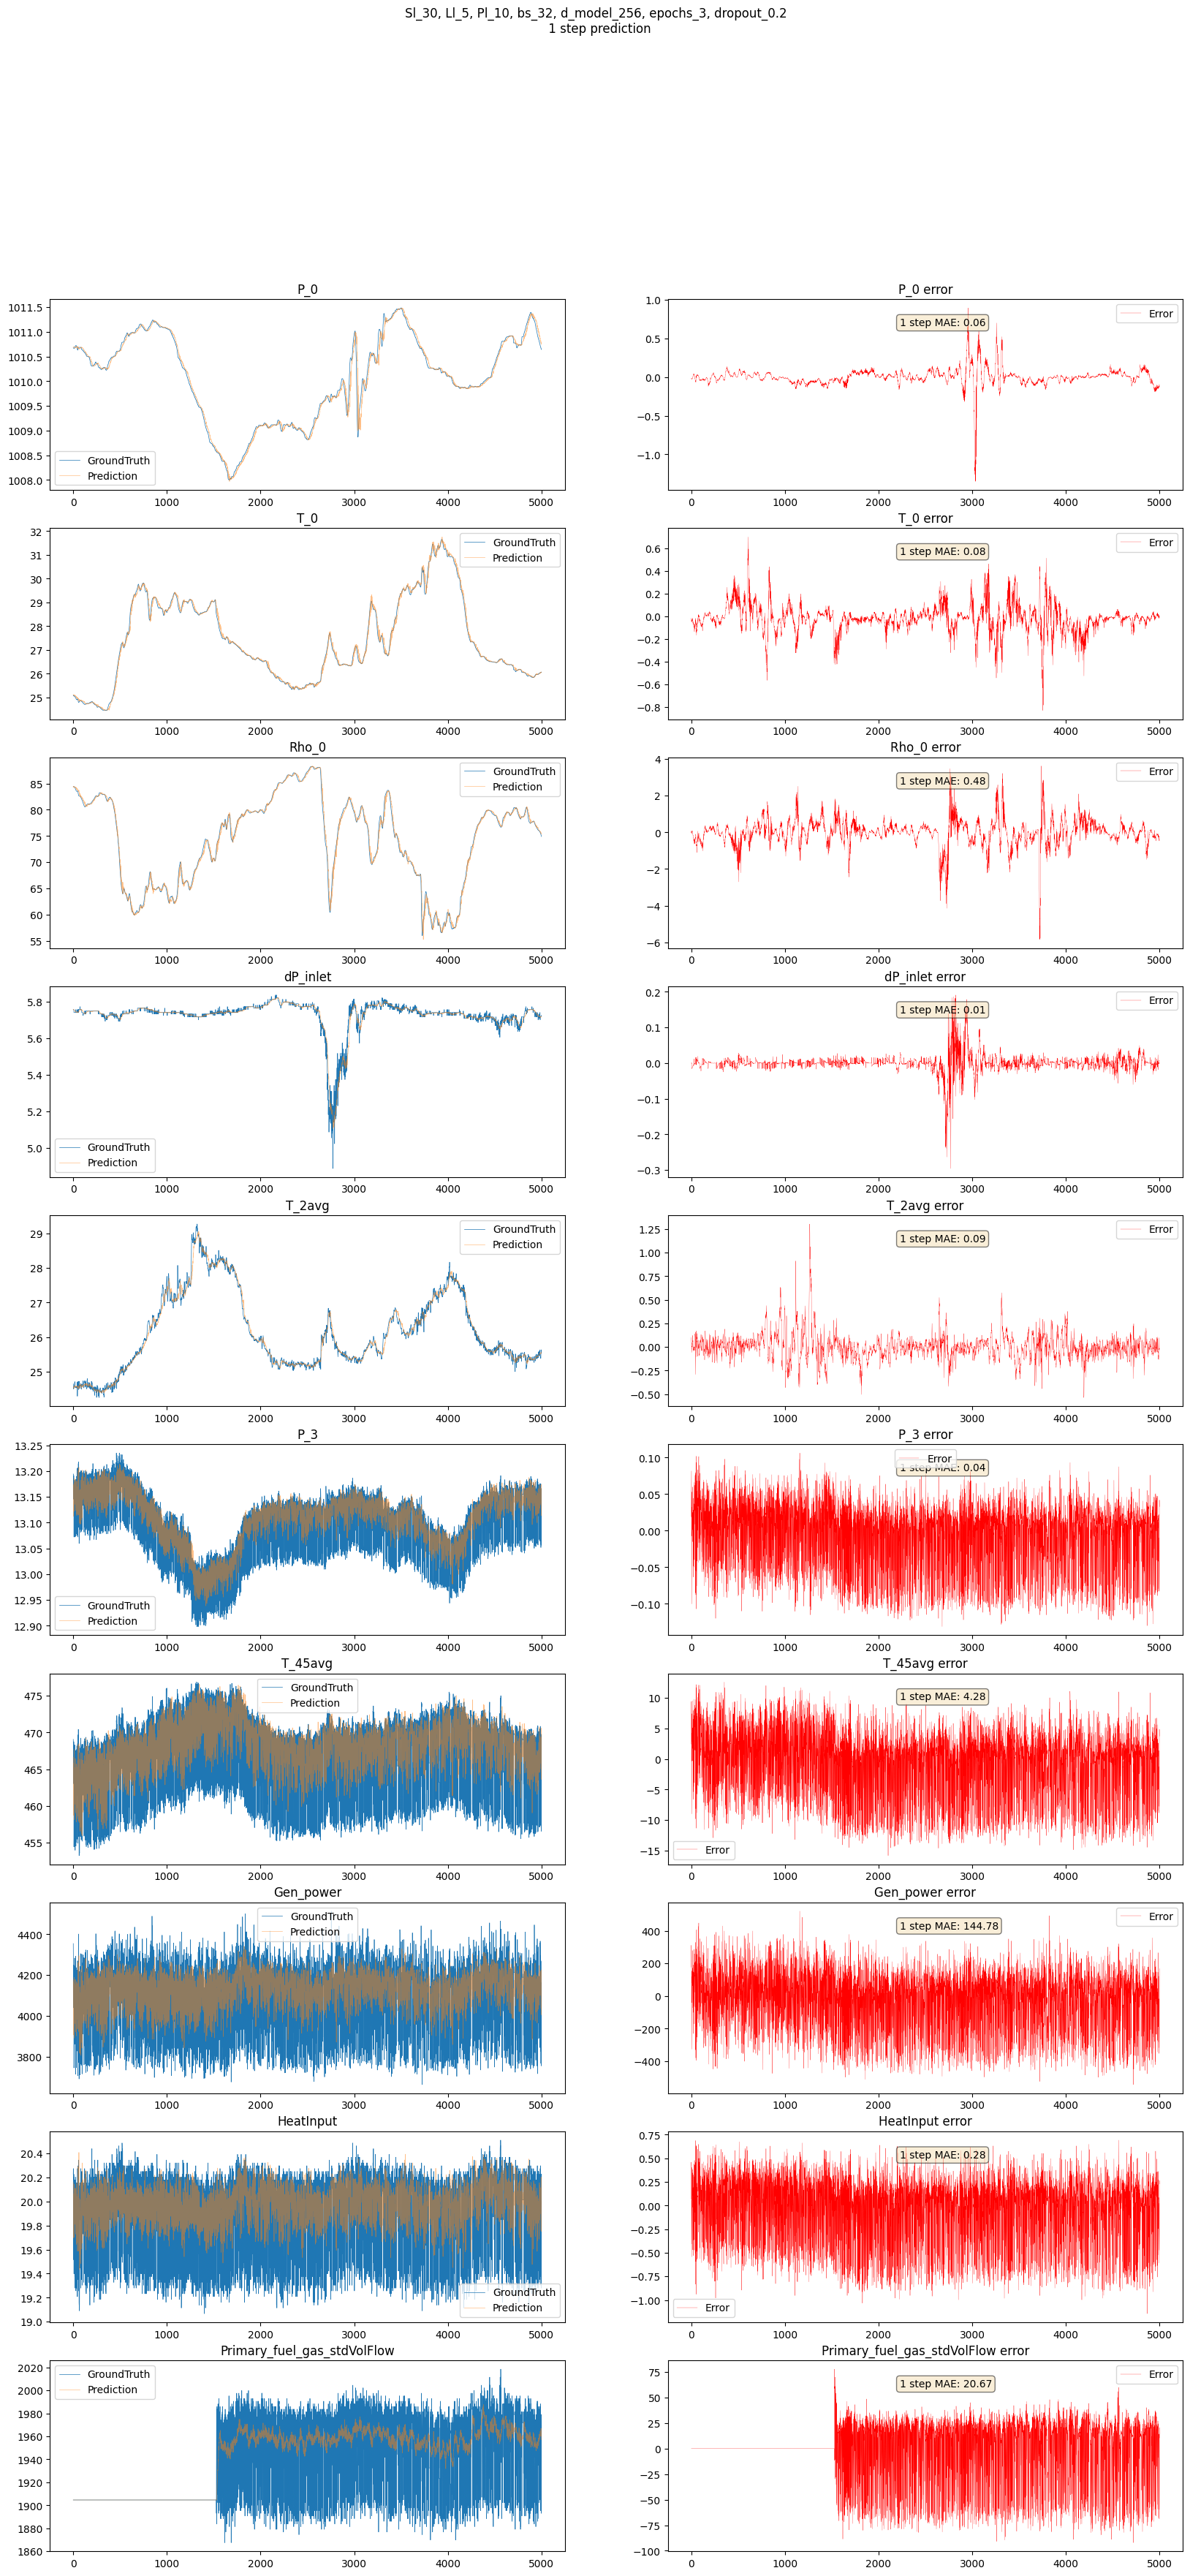

In [ ]:
preds = np.load(r"/content/results/long_term_forecast_WS_AGT42_Nonstationary_Transformer_WS_AGT42_ftM_sl30_ll5_pl10_dm32_nh8_el2_dl1_df32_fc3_ebtimeF_dtTrue_Exp_0/pred.npy")
trues = np.load(r"/content/results/long_term_forecast_WS_AGT42_Nonstationary_Transformer_WS_AGT42_ftM_sl30_ll5_pl10_dm32_nh8_el2_dl1_df32_fc3_ebtimeF_dtTrue_Exp_0/true.npy")

#Plot one-step predictions versus true data:
import matplotlib.pyplot as plt
%matplotlib inline
attributes = ['P_0', 'T_0', 'Rho_0', 'dP_inlet', 'T_2avg', 'P_3', 'T_45avg', 'Gen_power', 'HeatInput', 'Primary_fuel_gas_stdVolFlow']


fig, axs = plt.subplots(10, 2, figsize = (20,40))
step_pred = 1
fig.suptitle('Sl_30, Ll_5, Pl_10, bs_32, d_model_256, epochs_3, dropout_0.2 \n {} step prediction'.format(step_pred))
cut_low = 0
cut_high = 5000


for i in range(10):
    #row, col = divmod(i, 2)  # Calculate the row and column for each subplot
    p = [pred[step_pred-1,i] for pred in preds[cut_low:cut_high]] #one-step prediction
    #p_new = [pred[i] for pred in new_preds[:cut]] #one-step prediction
    t = [true[step_pred-1,i] for true in trues[cut_low:cut_high]] # one-step true
    error = [t[j] - p[j] for j in range(len(p))]
    MAE = np.mean(np.abs(error))
    axs[i, 0].plot(t, label='GroundTruth', linewidth=0.5)
    axs[i, 0].plot(p, label='Prediction', linewidth=0.5, alpha = 0.5)
    axs[i, 0].set_title(attributes[i])
    axs[i, 0].legend()

    axs[i, 1].plot(error, label = 'Error', linewidth = 0.2, color = 'red')
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axs[i, 1].text(0.45, 0.85, str(step_pred) + ' step MAE: '+ str(np.round(MAE, 2)), transform=axs[i,1].transAxes, fontsize=10, verticalalignment='bottom', bbox=props)
    axs[i, 1].set_title(attributes[i] + ' error')
    axs[i, 1].legend()

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Test af deres setup**

In [ ]:
root = r"/content/gdrive/MyDrive/Time-Series-Library/dataset/weather/weather"
my_config_iTransformer_weather = ModelConfig(task_name="long_term_forecast",  is_training = 1, root_path = root, data_path = 'weather.csv',
                       model_id = 'weather_96_96', model = 'iTransformer', data = 'custom', features = 'M', e_layers = 2, d_layers =1,
                       factor =3,seq_len =96, label_len =48, pred_len =96, enc_in =21, dec_in = 21, c_out =21, batch_size =16, d_model =512,
                       d_ff = 512, des ='Exp', itr =1, learning_rate =0.0001, loss = 'SMAPE', use_gpu = True, gpu = 0, scale = True, train_epochs = 10, inverse = True)

Exp = Exp_Long_Term_Forecast(my_config_iTransformer_weather)
Exp.train(my_config_iTransformer_weather.setting)

Use GPU: cuda:0
train 36696
val 5175
test 10444
	iters: 100, epoch: 1 | loss: 0.6098502
	speed: 0.0175s/iter; left time: 398.4889s
	iters: 200, epoch: 1 | loss: 2.2082174
	speed: 0.0126s/iter; left time: 286.3987s
	iters: 300, epoch: 1 | loss: 0.4552318
	speed: 0.0121s/iter; left time: 274.8912s
	iters: 400, epoch: 1 | loss: 2.2470443
	speed: 0.0120s/iter; left time: 271.3917s
	iters: 500, epoch: 1 | loss: 0.3828946
	speed: 0.0120s/iter; left time: 268.0710s
	iters: 600, epoch: 1 | loss: 0.3829345
	speed: 0.0115s/iter; left time: 257.0297s
	iters: 700, epoch: 1 | loss: 0.3838901
	speed: 0.0126s/iter; left time: 281.1732s
	iters: 800, epoch: 1 | loss: 0.2837480
	speed: 0.0125s/iter; left time: 276.5452s
	iters: 900, epoch: 1 | loss: 0.3078928
	speed: 0.0135s/iter; left time: 297.6116s
	iters: 1000, epoch: 1 | loss: 0.4205334
	speed: 0.0122s/iter; left time: 267.5997s
	iters: 1100, epoch: 1 | loss: 3.7655084
	speed: 0.0121s/iter; left time: 265.1315s
	iters: 1200, epoch: 1 | loss: 0.3425

Model(
  (enc_embedding): DataEmbedding_inverted(
    (value_embedding): Linear(in_features=96, out_features=512, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-1): 2 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): FullAttention(
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (query_projection): Linear(in_features=512, out_features=512, bias=True)
          (key_projection): Linear(in_features=512, out_features=512, bias=True)
          (value_projection): Linear(in_features=512, out_features=512, bias=True)
          (out_projection): Linear(in_features=512, out_features=512, bias=True)
        )
        (conv1): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(512, 512, kernel_size=(1,), stride=(1,))
        (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((512,), eps=1e-05, elementwise

In [ ]:
Exp.test(my_config_iTransformer_weather.setting)
torch.cuda.empty_cache()

test 10444
Now we are testing the test function...
Test scale True
inverse scale True
test shape: (10444, 1, 96, 21) (10444, 1, 96, 21)
test shape: (10444, 96, 21) (10444, 96, 21)
mse:2693.933837890625, mae:14.612878799438477


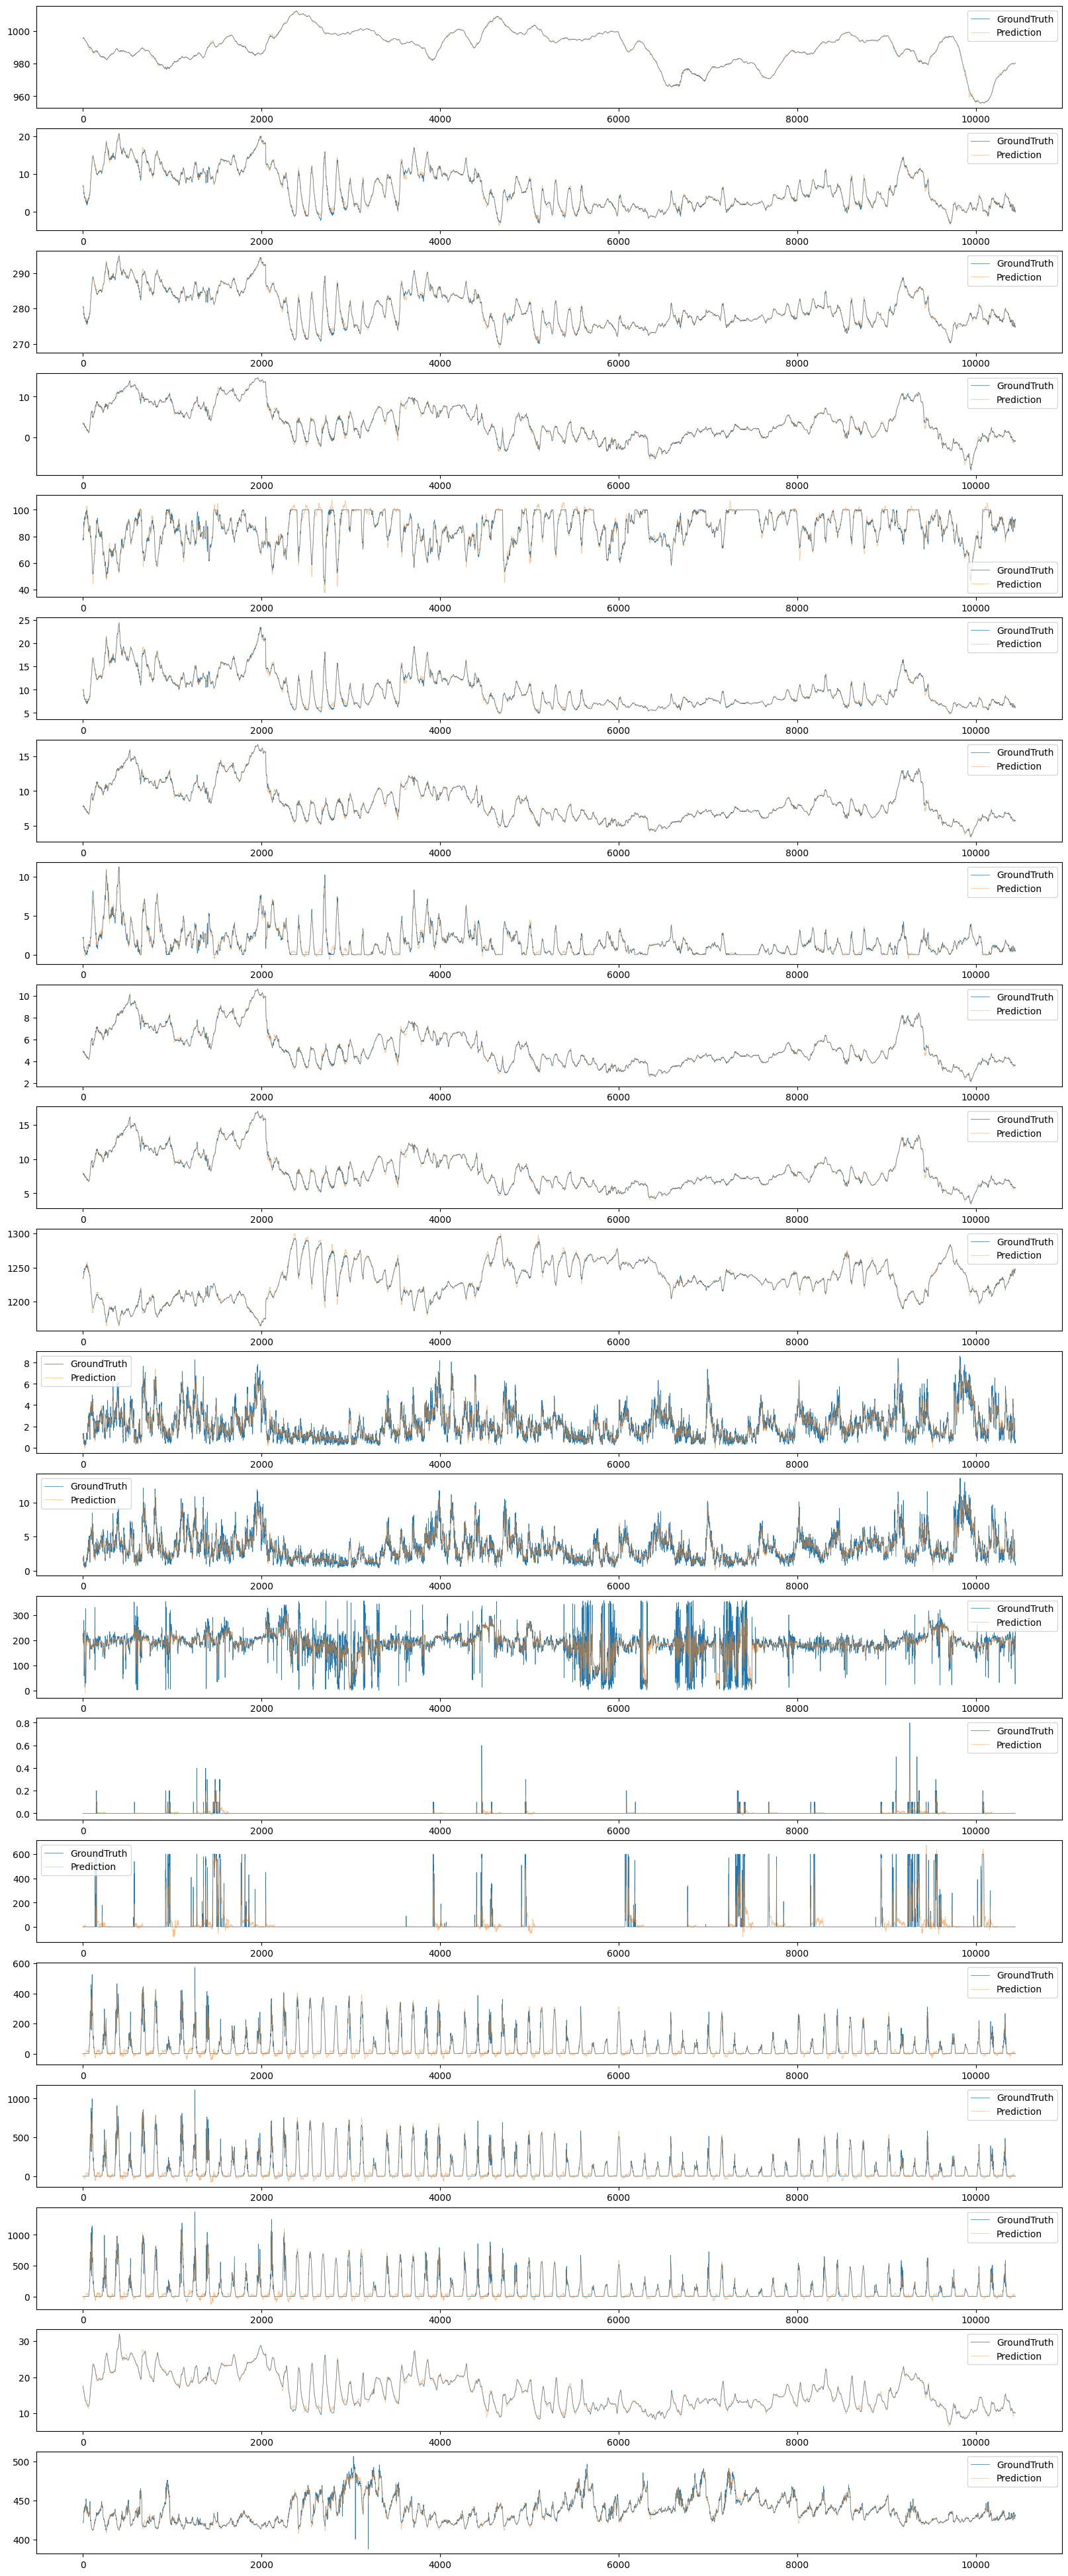

In [ ]:
preds = np.load(r"/content/results/long_term_forecast_weather_96_96_iTransformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df512_fc3_ebtimeF_dtTrue_Exp_0/pred.npy")
trues = np.load(r"/content/results/long_term_forecast_weather_96_96_iTransformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df512_fc3_ebtimeF_dtTrue_Exp_0/true.npy")

#Plot one-step predictions versus true data:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(21, 1, figsize = (20,50))


for i in range(21):
    #row, col = divmod(i, 2)  # Calculate the row and column for each subplot
    p = [pred[0,i] for pred in preds]
    t = [true[0,i] for true in trues]
    axs[i].plot(t, label='GroundTruth', linewidth=0.5)
    axs[i].plot(p, label='Prediction', linewidth=0.5, alpha = 0.5)
    #axs[i].plot([t[j] - p[j] for j in range(len(p))], label = 'Error', linewidth = 0.5)
    axs[i].legend()

plt.show()